# Data & Libraries

Cookbook Pandas: http://pandas.pydata.org/pandas-docs/stable/cookbook.html

API Reference Sklearn: http://scikit-learn.org/stable/modules/classes.html

In [513]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['c_bank.csv']
df = ds.to_dataframe()

In [514]:
import pandas as pd
import re, os
import scipy.optimize as spo
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection as lc

In [515]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [516]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

In [517]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Dataset

In [518]:
# df = pd.read_csv('c_bank.csv')
finance_df=df.drop('date', 1)

In [519]:
def normalize_data(df):
    n_df = df.ix[:, 1:] / df.ix[0, 1:]
    norm_df = n_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
    return norm_df

norm_df = normalize_data(df)
norm_df['date']=df['date']

norm_finance_df=norm_df.drop('date', 1)

## Features and Targets

In [520]:
metal_list=['silver', 'palladium', 'platinum', 'gold']
metal_list2=['silver', 'palladium','gold']
dual_metal_list=['dual_currency_basket', 'palladium', 'platinum', 'gold']
dual_metal_list2=['dual_currency_basket', 'palladium', 'gold']

In [521]:
features11 = norm_finance_df[metal_list]
target = norm_finance_df['dual_currency_basket']
features12 = norm_finance_df[metal_list2]

features21 = norm_finance_df[dual_metal_list]
target2 = norm_finance_df['silver']
features22 = norm_finance_df[dual_metal_list2]

In [522]:
X = norm_finance_df['dual_currency_basket'].values
Y = norm_finance_df['gold'].values

## Test sets after train sets

In [523]:
X_train11 = features11[:900]
X_test11 = features11[900:]
Y_train = target[:900]
Y_test = target[900:]
X_train12 = features12[:900]
X_test12 = features12[900:]

X_train21 = features21[:900]
X_test21 = features21[900:]
Y_train2 = target2[:900]
Y_test2 = target2[900:]
X_train22 = features22[:900]
X_test22 = features22[900:]

# Supervised Learning - Regression

## Functions

In [524]:
regressor_list = []
features_list = []
target_list = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []

In [525]:
def fit_score(regressor, x_train, y_train, x_test, y_test, features, target):
    features_list.append(features)
    target_list.append(target)
    regressor_list.append(str(regressor))
    
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_reg_train = reg.predict(x_train)
    y_reg_test = reg.predict(x_test)
    
    r2s_reg_train = r2_score(y_train, y_reg_train)
    r2_train.append(r2s_reg_train)
    r2s_reg_test = r2_score(y_test, y_reg_test)
    r2_test.append(r2s_reg_test)
    
    mse_reg_train = mean_squared_error(y_train, y_reg_train)
    mse_train.append(mse_reg_train)
    mse_reg_test = mean_squared_error(y_test, y_reg_test)
    mse_test.append(mse_reg_test)
    
    return y_reg_train, y_reg_test, r2s_reg_train, r2s_reg_test, mse_reg_train, mse_reg_test

## Support Vector Regression (SVR)

In [526]:
y_lin_train11, y_lin_test11, r2s_lin_train11, r2s_lin_test11, mse_lin_train11, mse_lin_test11 = \
fit_score(SVR(kernel='linear', C=1e3), X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [527]:
y_lin_train12, y_lin_test12, r2s_lin_train12, r2s_lin_test12, mse_lin_train12, mse_lin_test12 = \
fit_score(SVR(kernel='linear', C=1e3), X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [528]:
y_lin_train21, y_lin_test21, r2s_lin_train21, r2s_lin_test21, mse_lin_train21, mse_lin_test21 = \
fit_score(SVR(kernel='linear', C=1e3), X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [529]:
y_lin_train22, y_lin_test22, r2s_lin_train22, r2s_lin_test22, mse_lin_train22, mse_lin_test22 = \
fit_score(SVR(kernel='linear', C=1e3), X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

In [530]:
y_rbf_train11, y_rbf_test11, r2s_rbf_train11, r2s_rbf_test11, mse_rbf_train11, mse_rbf_test11 = \
fit_score(SVR(kernel='rbf', C=1e3, gamma=0.1), X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [531]:
y_rbf_train12, y_rbf_test12, r2s_rbf_train12, r2s_rbf_test12, mse_rbf_train12, mse_rbf_test12 = \
fit_score(SVR(kernel='rbf', C=1e3, gamma=0.1), X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [532]:
y_rbf_train21, y_rbf_test21, r2s_rbf_train21, r2s_rbf_test21, mse_rbf_train21, mse_rbf_test21 = \
fit_score(SVR(kernel='rbf', C=1e3, gamma=0.1), X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [533]:
y_rbf_train22, y_rbf_test22, r2s_rbf_train22, r2s_rbf_test22, mse_rbf_train22, mse_rbf_test22 = \
fit_score(SVR(kernel='rbf', C=1e3, gamma=0.1), X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

In [534]:
y_poly_train11, y_poly_test11, r2s_poly_train11, r2s_poly_test11, mse_poly_train11, mse_poly_test11 = \
fit_score(SVR(kernel='poly', C=1e3, degree=2), X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [535]:
y_poly_train12, y_poly_test12, r2s_poly_train12, r2s_poly_test12, mse_poly_train12, mse_poly_test12 = \
fit_score(SVR(kernel='poly', C=1e3, degree=2), X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [536]:
y_poly_train21, y_poly_test21, r2s_poly_train21, r2s_poly_test21, mse_poly_train21, mse_poly_test21 = \
fit_score(SVR(kernel='poly', C=1e3, degree=2), X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [537]:
y_poly_train22, y_poly_test22, r2s_poly_train22, r2s_poly_test22, mse_poly_train22, mse_poly_test22 = \
fit_score(SVR(kernel='poly', C=1e3, degree=2), X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

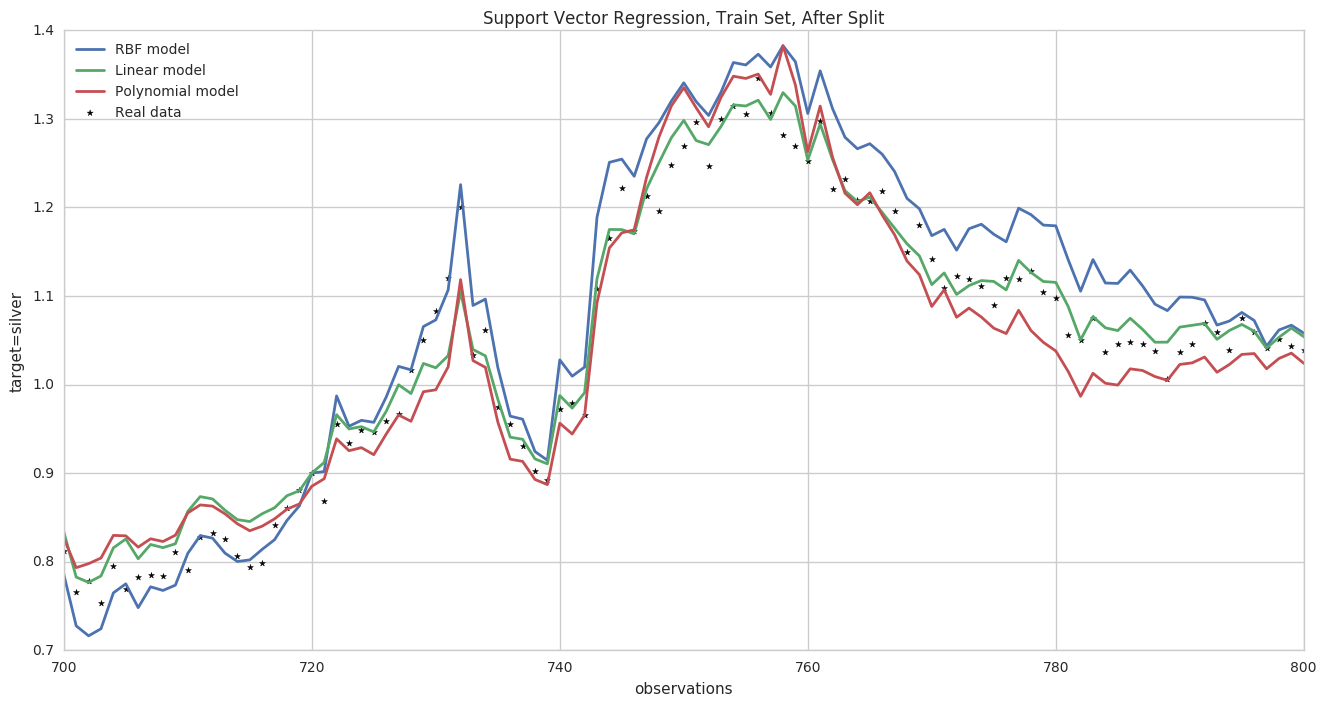

In [538]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(900)
plt.scatter(x, Y_train2, marker='*', color='black', label='Real data')
plt.axis((700, 800, 0.7, 1.4))
plt.plot(x, y_rbf_train22, lw=2, label='RBF model')
plt.plot(x, y_lin_train22, lw=2, label='Linear model')
plt.plot(x, y_poly_train22, lw=2, label='Polynomial model')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Support Vector Regression, Train Set, After Split')
plt.legend(loc=2)

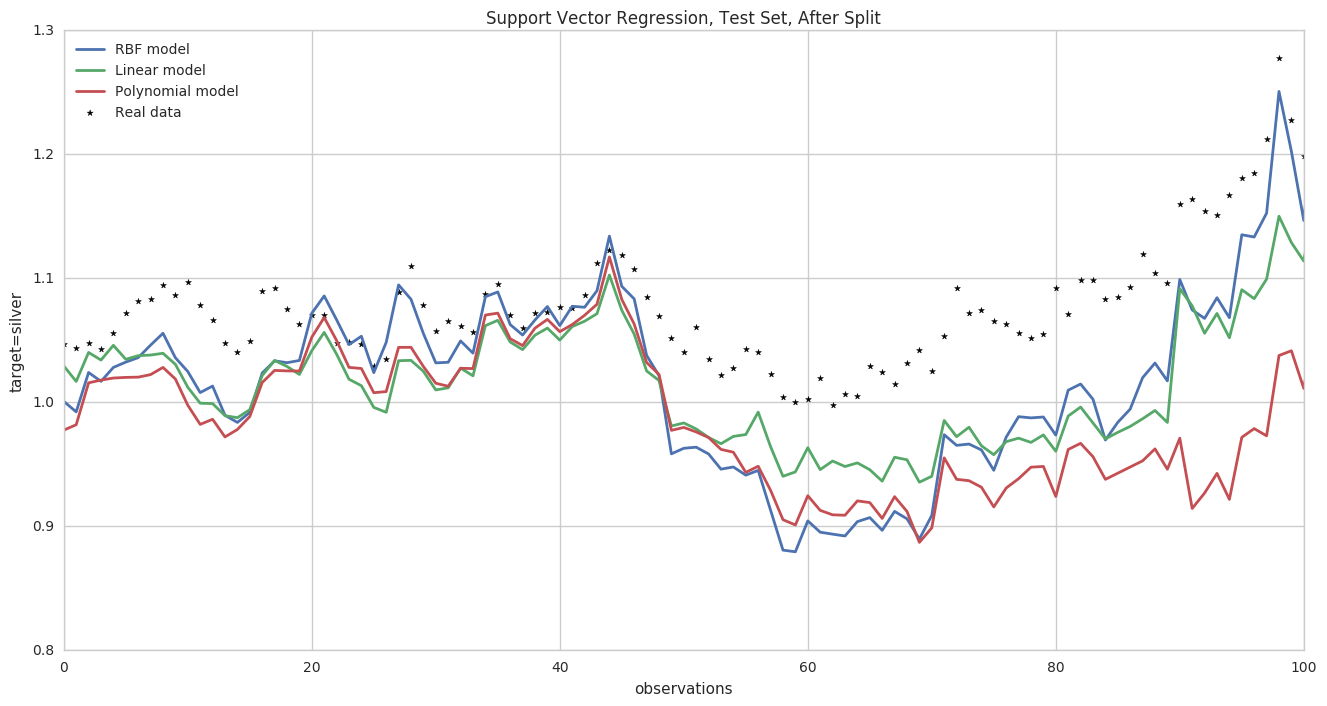

In [539]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.8, 1.3))
plt.plot(x, y_rbf_test22, lw=2, label='RBF model')
plt.plot(x, y_lin_test22, lw=2, label='Linear model')
plt.plot(x, y_poly_test22, lw=2, label='Polynomial model')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Support Vector Regression, Test Set, After Split')
plt.legend(loc=2)

## Gradient Boosting Regressor

In [540]:
y_gbr_train11, y_gbr_test11, r2s_gbr_train11, r2s_gbr_test11, mse_gbr_train11, mse_gbr_test11 = \
fit_score(GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=.1, min_samples_leaf=5, min_samples_split=5), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [541]:
y_gbr_train12, y_gbr_test12, r2s_gbr_train12, r2s_gbr_test12, mse_gbr_train12, mse_gbr_test12 = \
fit_score(GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=.1, min_samples_leaf=5, min_samples_split=5), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [542]:
y_gbr_train21, y_gbr_test21, r2s_gbr_train21, r2s_gbr_test21, mse_gbr_train21, mse_gbr_test21 = \
fit_score(GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=.1, min_samples_leaf=5, min_samples_split=5), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [543]:
y_gbr_train22, y_gbr_test22, r2s_gbr_train22, r2s_gbr_test22, mse_gbr_train22, mse_gbr_test22 = \
fit_score(GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=.1, min_samples_leaf=5, min_samples_split=5), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

## Random Forest Regressor

In [544]:
y_rfr_train11, y_rfr_test11, r2s_rfr_train11, r2s_rfr_test11, mse_rfr_train11, mse_rfr_test11 = \
fit_score(RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=3, min_samples_split=3), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [545]:
y_rfr_train12, y_rfr_test12, r2s_rfr_train12, r2s_rfr_test12, mse_rfr_train12, mse_rfr_test12 = \
fit_score(RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=3, min_samples_split=3), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [546]:
y_rfr_train21, y_rfr_test21, r2s_rfr_train21, r2s_rfr_test21, mse_rfr_train21, mse_rfr_test21 = \
fit_score(RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=3, min_samples_split=3), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [547]:
y_rfr_train22, y_rfr_test22, r2s_rfr_train22, r2s_rfr_test22, mse_rfr_train22, mse_rfr_test22 = \
fit_score(RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=3, min_samples_split=3), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

## Ada Boost Regressor

In [548]:
y_abr_train11, y_abr_test11, r2s_abr_train11, r2s_abr_test11, mse_abr_train11, mse_abr_test11 = \
fit_score(AdaBoostRegressor(n_estimators=200, learning_rate=1.0), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [549]:
y_abr_train12, y_abr_test12, r2s_abr_train12, r2s_abr_test12, mse_abr_train12, mse_abr_test12 = \
fit_score(AdaBoostRegressor(n_estimators=200, learning_rate=1.0), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [550]:
y_abr_train21, y_abr_test21, r2s_abr_train21, r2s_abr_test21, mse_abr_train21, mse_abr_test21 = \
fit_score(AdaBoostRegressor(n_estimators=200, learning_rate=1.0), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [551]:
y_abr_train22, y_abr_test22, r2s_abr_train22, r2s_abr_test22, mse_abr_train22, mse_abr_test22 = \
fit_score(AdaBoostRegressor(n_estimators=200, learning_rate=1.0), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

## Bagging Regressor

In [552]:
y_br_train11, y_br_test11, r2s_br_train11, r2s_br_test11, mse_br_train11, mse_br_test11 = \
fit_score(BaggingRegressor(n_estimators=200), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [553]:
y_br_train12, y_br_test12, r2s_br_train12, r2s_br_test12, mse_br_train12, mse_br_test12 = \
fit_score(BaggingRegressor(n_estimators=200), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [554]:
y_br_train21, y_br_test21, r2s_br_train21, r2s_br_test21, mse_br_train21, mse_br_test21 = \
fit_score(BaggingRegressor(n_estimators=200), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [555]:
y_br_train22, y_br_test22, r2s_br_train22, r2s_br_test22, mse_br_train22, mse_br_test22 = \
fit_score(BaggingRegressor(n_estimators=200), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

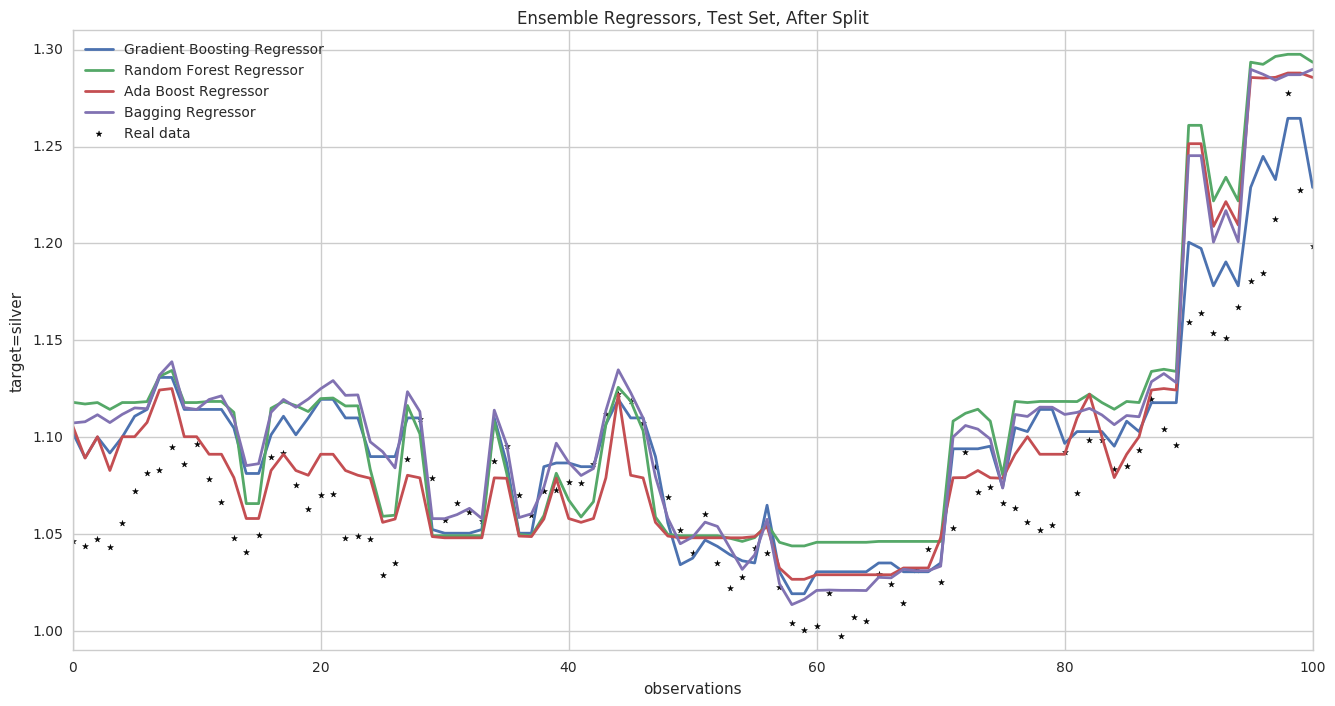

In [556]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.99, 1.31))
plt.plot(x, y_gbr_test22, lw=2, label='Gradient Boosting Regressor')
plt.plot(x, y_rfr_test22, lw=2, label='Random Forest Regressor')
plt.plot(x, y_abr_test22, lw=2, label='Ada Boost Regressor')
plt.plot(x, y_br_test22, lw=2, label='Bagging Regressor')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Ensemble Regressors, Test Set, After Split')
plt.legend(loc=2)

## Extra Trees Regressor

In [557]:
y_etr_train11, y_etr_test11, r2s_etr_train11, r2s_etr_test11, mse_etr_train11, mse_etr_test11 = \
fit_score(ExtraTreesRegressor(n_estimators=200, max_depth=5), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [558]:
y_etr_train12, y_etr_test12, r2s_etr_train12, r2s_etr_test12, mse_etr_train12, mse_etr_test12 = \
fit_score(ExtraTreesRegressor(n_estimators=200, max_depth=5), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [559]:
y_etr_train21, y_etr_test21, r2s_etr_train21, r2s_etr_test21, mse_etr_train21, mse_etr_test21 = \
fit_score(ExtraTreesRegressor(n_estimators=200, max_depth=5), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [560]:
y_etr_train22, y_etr_test22, r2s_etr_train22, r2s_etr_test22, mse_etr_train22, mse_etr_test22 = \
fit_score(ExtraTreesRegressor(n_estimators=200, max_depth=5), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

### Decision Tree Regressor

In [561]:
y_dtr_train11, y_dtr_test11, r2s_dtr_train11, r2s_dtr_test11, mse_dtr_train11, mse_dtr_test11 = \
fit_score(DecisionTreeRegressor(max_depth=5), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [562]:
y_dtr_train12, y_dtr_test12, r2s_dtr_train12, r2s_dtr_test12, mse_dtr_train12, mse_dtr_test12 = \
fit_score(DecisionTreeRegressor(max_depth=5), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [563]:
y_dtr_train21, y_dtr_test21, r2s_dtr_train21, r2s_dtr_test21, mse_dtr_train21, mse_dtr_test21 = \
fit_score(DecisionTreeRegressor(max_depth=5), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [564]:
y_dtr_train22, y_dtr_test22, r2s_dtr_train22, r2s_dtr_test22, mse_dtr_train22, mse_dtr_test22 = \
fit_score(DecisionTreeRegressor(max_depth=5), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

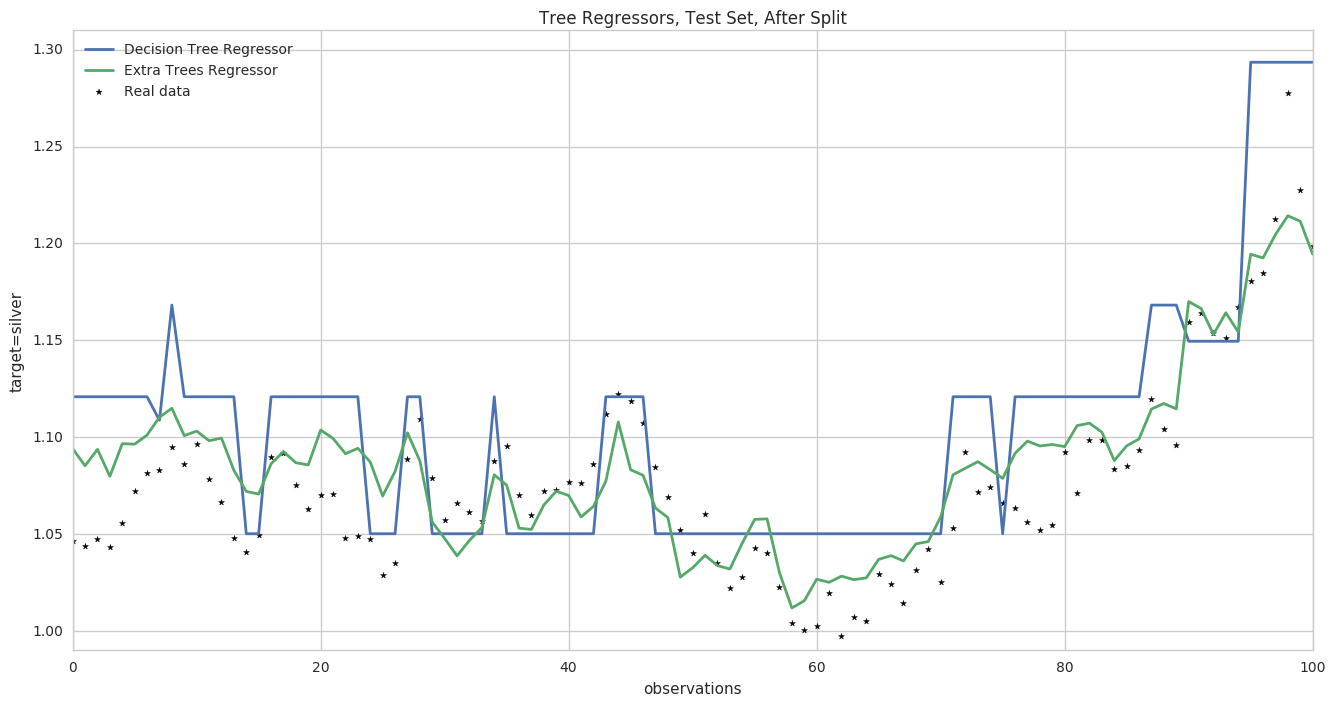

In [565]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.99, 1.31))
plt.plot(x, y_dtr_test22, lw=2, label='Decision Tree Regressor')
plt.plot(x, y_etr_test22, lw=2, label='Extra Trees Regressor')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Tree Regressors, Test Set, After Split')
plt.legend(loc=2)

## KNeighbors Regressor

In [566]:
y_knr_train11, y_knr_test11, r2s_knr_train11, r2s_knr_test11, mse_knr_train11, mse_knr_test11 = \
fit_score(KNeighborsRegressor(n_neighbors=7), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [567]:
y_knr_train12, y_knr_test12, r2s_knr_train12, r2s_knr_test12, mse_knr_train12, mse_knr_test12 = \
fit_score(KNeighborsRegressor(n_neighbors=7), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [568]:
y_knr_train21, y_knr_test21, r2s_knr_train21, r2s_knr_test21, mse_knr_train21, mse_knr_test21 = \
fit_score(KNeighborsRegressor(n_neighbors=7), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [569]:
y_knr_train22, y_knr_test22, r2s_knr_train22, r2s_knr_test22, mse_knr_train22, mse_knr_test22 = \
fit_score(KNeighborsRegressor(n_neighbors=7), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

## Radius Neighbors Regressor

In [570]:
y_rnr_train11, y_rnr_test11, r2s_rnr_train11, r2s_rnr_test11, mse_rnr_train11, mse_rnr_test11 = \
fit_score(RadiusNeighborsRegressor(radius=0.5), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [571]:
y_rnr_train12, y_rnr_test12, r2s_rnr_train12, r2s_rnr_test12, mse_rnr_train12, mse_rnr_test12 = \
fit_score(RadiusNeighborsRegressor(radius=0.5), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [572]:
y_rnr_train21, y_rnr_test21, r2s_rnr_train21, r2s_rnr_test21, mse_rnr_train21, mse_rnr_test21 = \
fit_score(RadiusNeighborsRegressor(radius=0.5), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [573]:
y_rnr_train22, y_rnr_test22, r2s_rnr_train22, r2s_rnr_test22, mse_rnr_train22, mse_rnr_test22 = \
fit_score(RadiusNeighborsRegressor(radius=0.5), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

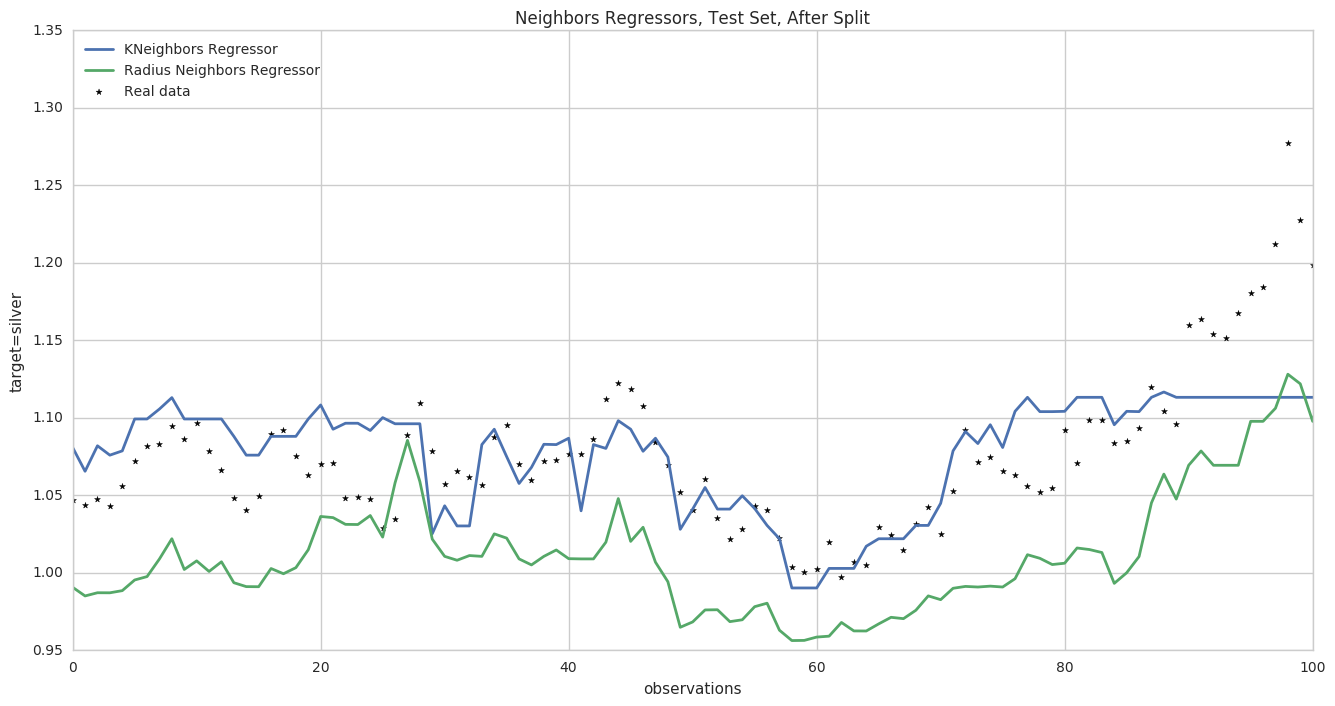

In [574]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.95, 1.35))
plt.plot(x, y_knr_test22, lw=2, label='KNeighbors Regressor')
plt.plot(x, y_rnr_test22, lw=2, label='Radius Neighbors Regressor')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Neighbors Regressors, Test Set, After Split')
plt.legend(loc=2)

## Ridge

In [575]:
y_r_train11, y_r_test11, r2s_r_train11, r2s_r_test11, mse_r_train11, mse_r_test11 = \
fit_score(Ridge(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [576]:
y_r_train12, y_r_test12, r2s_r_train12, r2s_r_test12, mse_r_train12, mse_r_test12 = \
fit_score(Ridge(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [577]:
y_r_train21, y_r_test21, r2s_r_train21, r2s_r_test21, mse_r_train21, mse_r_test21 = \
fit_score(Ridge(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [578]:
y_r_train22, y_r_test22, r2s_r_train22, r2s_r_test22, mse_r_train22, mse_r_test22 = \
fit_score(Ridge(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

### RidgeCV

In [579]:
y_rcv_train11, y_rcv_test11, r2s_rcv_train11, r2s_rcv_test11, mse_rcv_train11, mse_rcv_test11 = \
fit_score(RidgeCV(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [580]:
y_rcv_train12, y_rcv_test12, r2s_rcv_train12, r2s_rcv_test12, mse_rcv_train12, mse_rcv_test12 = \
fit_score(RidgeCV(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [581]:
y_rcv_train21, y_rcv_test21, r2s_rcv_train21, r2s_rcv_test21, mse_rcv_train21, mse_rcv_test21 = \
fit_score(RidgeCV(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [582]:
y_rcv_train22, y_rcv_test22, r2s_rcv_train22, r2s_rcv_test22, mse_rcv_train22, mse_rcv_test22 = \
fit_score(RidgeCV(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

## Bayesian Ridge

In [583]:
y_br_train11, y_br_test11, r2s_br_train11, r2s_br_test11, mse_br_train11, mse_br_test11 = \
fit_score(BayesianRidge(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [584]:
y_br_train12, y_br_test12, r2s_br_train12, r2s_br_test12, mse_br_train12, mse_br_test12 = \
fit_score(BayesianRidge(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [585]:
y_br_train21, y_br_test21, r2s_br_train21, r2s_br_test21, mse_br_train21, mse_br_test21 = \
fit_score(BayesianRidge(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [586]:
y_br_train22, y_br_test22, r2s_br_train22, r2s_br_test22, mse_br_train22, mse_br_test22 = \
fit_score(BayesianRidge(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

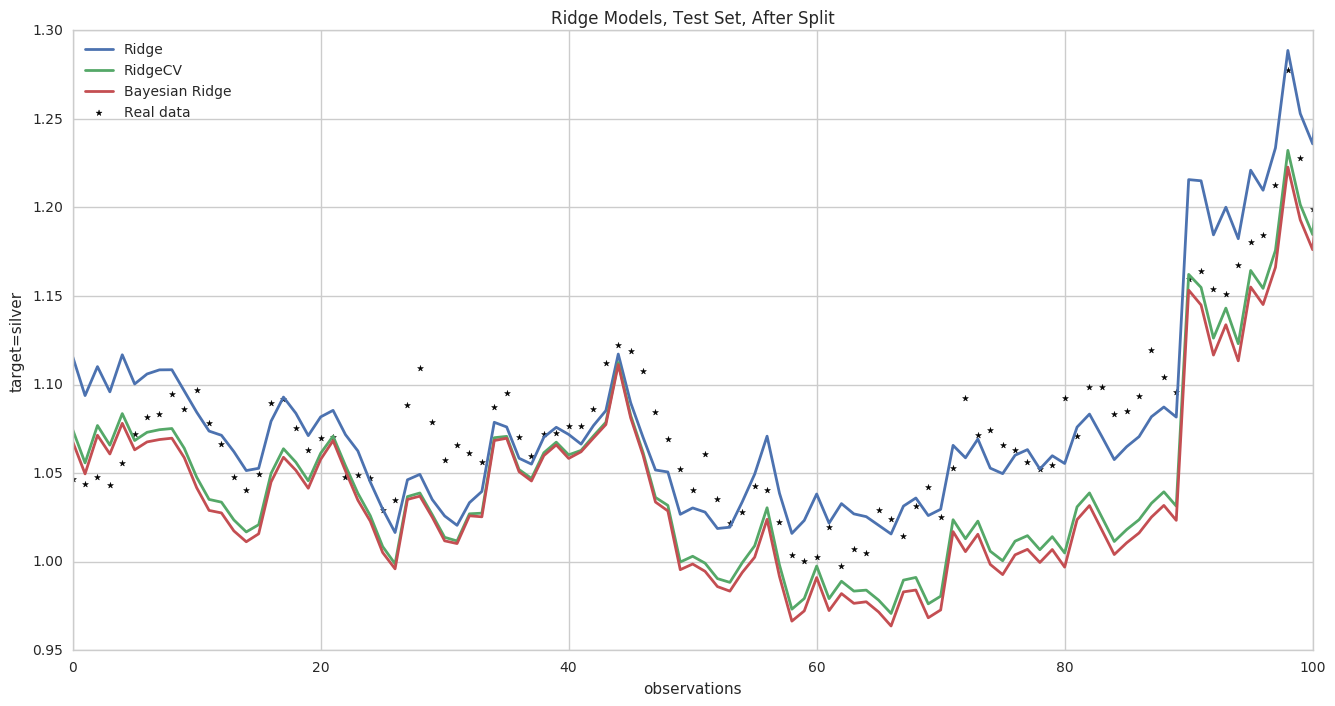

In [587]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.95, 1.3))
plt.plot(x, y_r_test22, lw=2, label='Ridge')
plt.plot(x, y_rcv_test22, lw=2, label='RidgeCV')
plt.plot(x, y_br_test22, lw=2, label='Bayesian Ridge')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Ridge Models, Test Set, After Split')
plt.legend(loc=2)

### Linear Regression

In [588]:
y_lr_train11, y_lr_test11, r2s_lr_train11, r2s_lr_test11, mse_lr_train11, mse_lr_test11 = \
fit_score(LinearRegression(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [589]:
y_lr_train12, y_lr_test12, r2s_lr_train12, r2s_lr_test12, mse_lr_train12, mse_lr_test12 = \
fit_score(LinearRegression(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [590]:
y_lr_train21, y_lr_test21, r2s_lr_train21, r2s_lr_test21, mse_lr_train21, mse_lr_test21 = \
fit_score(LinearRegression(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium','platinum', 'gold'], 'silver')

In [591]:
y_lr_train22, y_lr_test22, r2s_lr_train22, r2s_lr_test22, mse_lr_train22, mse_lr_test22 = \
fit_score(LinearRegression(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

### SGD Regressor

In [592]:
y_sgdr_train11, y_sgdr_test11, r2s_sgdr_train11, r2s_sgdr_test11, mse_sgdr_train11, mse_sgdr_test11 = \
fit_score(SGDRegressor(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [593]:
y_sgdr_train12, y_sgdr_test12, r2s_sgdr_train12, r2s_sgdr_test12, mse_sgdr_train12, mse_sgdr_test12 = \
fit_score(SGDRegressor(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [594]:
y_sgdr_train21, y_sgdr_test21, r2s_sgdr_train21, r2s_sgdr_test21, mse_sgdr_train21, mse_sgdr_test21 = \
fit_score(SGDRegressor(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [595]:
y_sgdr_train22, y_sgdr_test22, r2s_sgdr_train22, r2s_sgdr_test22, mse_sgdr_train22, mse_sgdr_test22 = \
fit_score(SGDRegressor(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

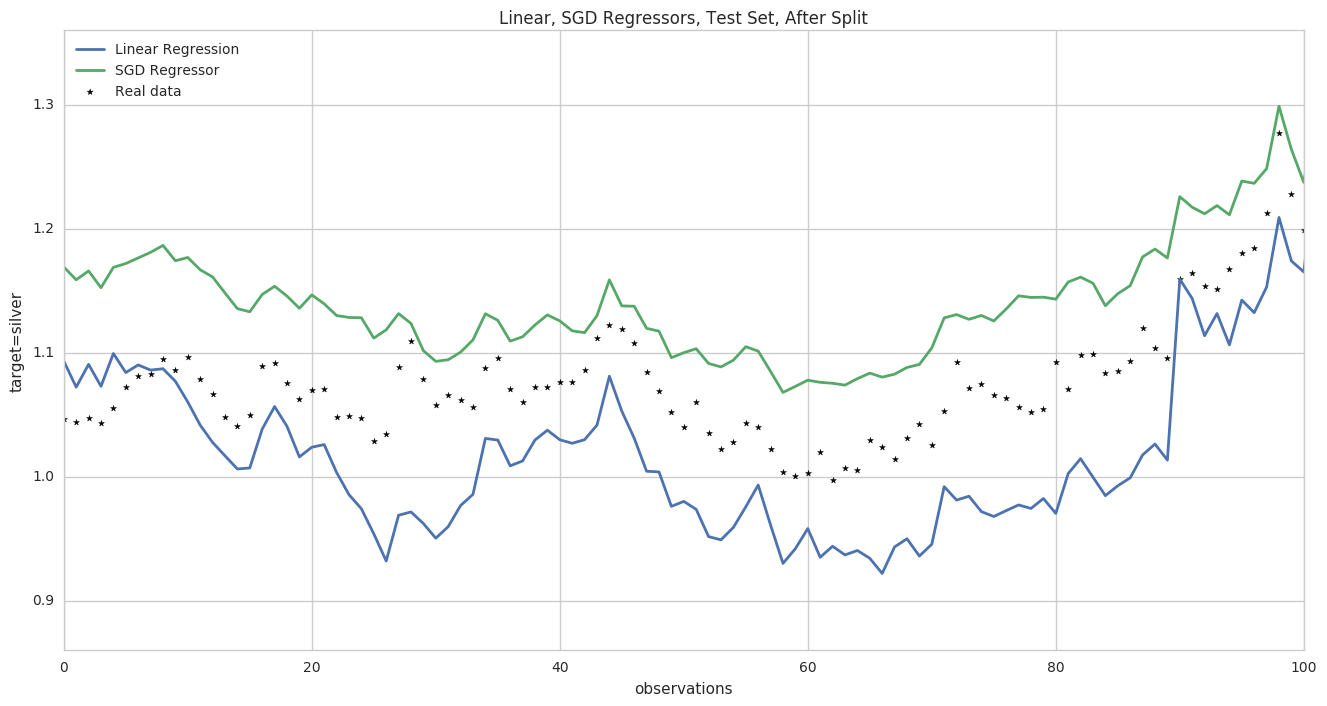

In [596]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.86, 1.36))
plt.plot(x, y_lr_test21, lw=2, label='Linear Regression')
plt.plot(x, y_sgdr_test21, lw=2, label='SGD Regressor')

plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Linear, SGD Regressors, Test Set, After Split')
plt.legend(loc=2)

### Huber Regressor

In [597]:
y_hr_train11, y_hr_test11, r2s_hr_train11, r2s_hr_test11, mse_hr_train11, mse_hr_test11 = \
fit_score(HuberRegressor(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [598]:
y_hr_train12, y_hr_test12, r2s_hr_train12, r2s_hr_test12, mse_hr_train12, mse_hr_test12 = \
fit_score(HuberRegressor(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [599]:
y_hr_train21, y_hr_test21, r2s_hr_train21, r2s_hr_test21, mse_hr_train21, mse_hr_test21 = \
fit_score(HuberRegressor(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [600]:
y_hr_train22, y_hr_test22, r2s_hr_train22, r2s_hr_test22, mse_hr_train22, mse_hr_test22 = \
fit_score(HuberRegressor(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

### RANSAC Regressor

In [601]:
y_rar_train11, y_rar_test11, r2s_rar_train11, r2s_rar_test11, mse_rar_train11, mse_rar_test11 = \
fit_score(RANSACRegressor(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [602]:
y_rar_train12, y_rar_test12, r2s_rar_train12, r2s_rar_test12, mse_rar_train12, mse_rar_test12 = \
fit_score(RANSACRegressor(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [603]:
y_rar_train21, y_rar_test21, r2s_rar_train21, r2s_rar_test21, mse_rar_train21, mse_rar_test21 = \
fit_score(RANSACRegressor(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [604]:
y_rar_train22, y_rar_test22, r2s_rar_train22, r2s_rar_test22, mse_rar_train22, mse_rar_test22 = \
fit_score(RANSACRegressor(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

### Theil Sen Regressor

In [605]:
y_tsr_train11, y_tsr_test11, r2s_tsr_train11, r2s_tsr_test11, mse_tsr_train11, mse_tsr_test11 = \
fit_score(TheilSenRegressor(), 
          X_train11, Y_train, X_test11, Y_test, 
          ['silver', 'palladium', 'platinum', 'gold'], 'dual_currency_basket')

In [606]:
y_tsr_train12, y_tsr_test12, r2s_tsr_train12, r2s_tsr_test12, mse_tsr_train12, mse_tsr_test12 = \
fit_score(TheilSenRegressor(), 
          X_train12, Y_train, X_test12, Y_test, 
          ['silver', 'palladium', 'gold'], 'dual_currency_basket')

In [607]:
y_tsr_train21, y_tsr_test21, r2s_tsr_train21, r2s_tsr_test21, mse_tsr_train21, mse_tsr_test21 = \
fit_score(TheilSenRegressor(), 
          X_train21, Y_train2, X_test21, Y_test2, 
          ['dual_currency_basket', 'palladium', 'platinum', 'gold'], 'silver')

In [608]:
y_tsr_train22, y_tsr_test22, r2s_tsr_train22, r2s_tsr_test22, mse_tsr_train22, mse_tsr_test22 = \
fit_score(TheilSenRegressor(), 
          X_train22, Y_train2, X_test22, Y_test2, 
          ['dual_currency_basket', 'palladium', 'gold'], 'silver')

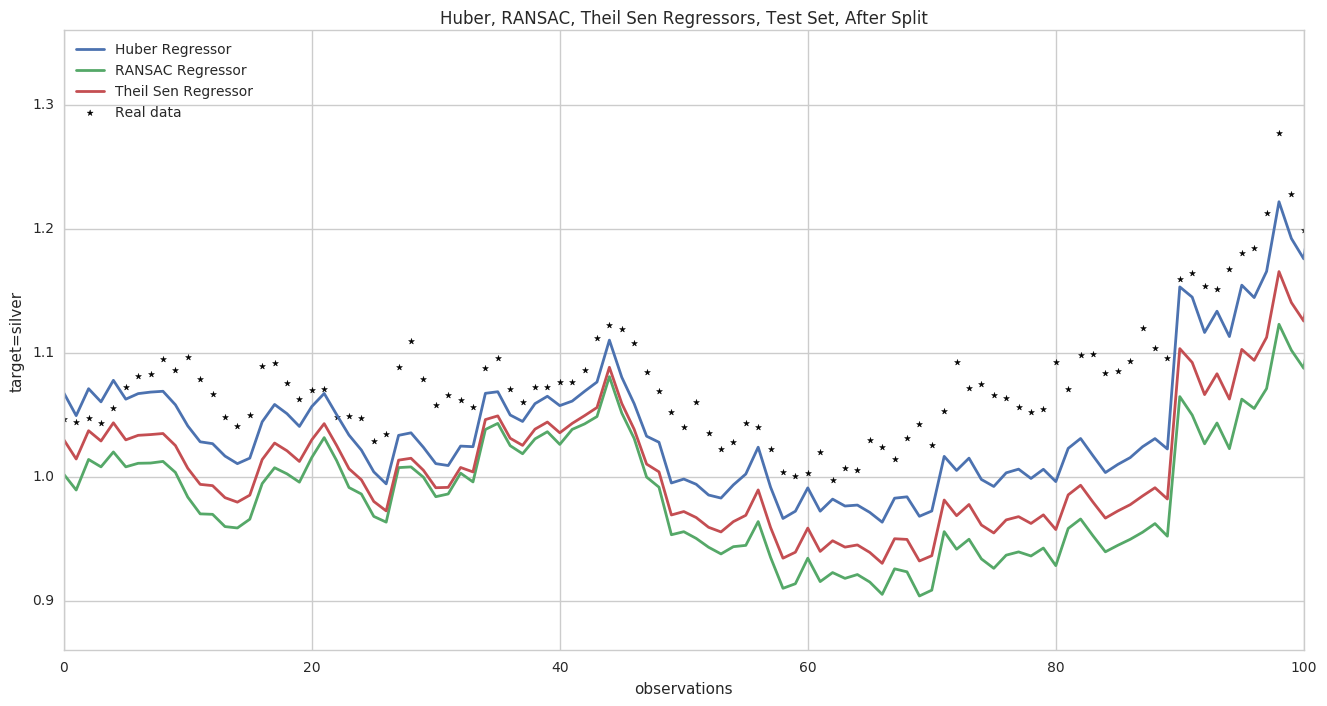

In [609]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))
x=range(228)
plt.scatter(x, Y_test2, marker='*', color='black', label='Real data')
plt.axis((0, 100, 0.86, 1.36))
plt.plot(x, y_hr_test22, lw=2, label='Huber Regressor')
plt.plot(x, y_rar_test22, lw=2, label='RANSAC Regressor')
plt.plot(x, y_tsr_test22, lw=2, label='Theil Sen Regressor')
plt.xlabel('observations')
plt.ylabel('target=silver')
plt.title('Huber, RANSAC, Theil Sen Regressors, Test Set, After Split')
plt.legend(loc=2)

In [610]:
df_results = pd.DataFrame({'regressor' : regressor_list,
                           'features': features_list,
                           'target': target_list,
                           'r2_train': r2_train,
                           'r2_test': r2_test,
                           'mse_train': mse_train,
                           'mse_test': mse_test})

In [611]:
df_results['regressor'][34]

"DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,\n           max_leaf_nodes=None, min_impurity_split=1e-07,\n           min_samples_leaf=1, min_samples_split=2,\n           min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n           splitter='best')"

In [612]:
df_results.sort_values('r2_test', ascending=False)

,features,mse_test,mse_train,r2_test,r2_train,regressor,target
15,"[dual_currency_basket, palladium, gold]",0.003449,0.000333,0.701502,0.985375,"GradientBoostingRegressor(alpha=0.9, criterion...",silver
23,"[dual_currency_basket, palladium, gold]",0.003786,0.001301,0.672369,0.942908,"AdaBoostRegressor(base_estimator=None, learnin...",silver
27,"[dual_currency_basket, palladium, gold]",0.003881,0.000056,0.664141,0.997549,"BaggingRegressor(base_estimator=None, bootstra...",silver
7,"[dual_currency_basket, palladium, gold]",0.004013,0.001849,0.652723,0.918862,"SVR(C=1000.0, cache_size=200, coef0=0.0, degre...",silver
35,"[dual_currency_basket, palladium, gold]",0.004195,0.001438,0.636958,0.936920,"DecisionTreeRegressor(criterion='mse', max_dep...",silver
19,"[dual_currency_basket, palladium, gold]",0.004307,0.000940,0.627264,0.958766,"RandomForestRegressor(bootstrap=True, criterio...",silver
3,"[dual_currency_basket, palladium, gold]",0.004422,0.001646,0.617290,0.927787,"SVR(C=1000.0, cache_size=200, coef0=0.0, degre...",silver
10,"[dual_currency_basket, palladium, platinum, gold]",0.004443,0.001573,0.615506,0.930963,"SVR(C=1000.0, cache_size=200, coef0=0.0, degre...",silver
26,"[dual_currency_basket, palladium, platinum, gold]",0.004534,0.000056,0.607598,0.997557,"BaggingRegressor(base_estimator=None, bootstra...",silver
14,"[dual_currency_basket, palladium, platinum, gold]",0.005024,0.000287,0.565164,0.987407,"GradientBoostingRegressor(alpha=0.9, criterion...",silver
